In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import cv2
import matplotlib
import matplotlib.pyplot as plt
from conversion import convert_to_3_stroke
from face_data import load_faces
from tqdm import tqdm
from svg_util import draw_strokes, make_grid_svg
from neuralnet import load_trained_classifier
from neuralnet.sketch_rnn_class import predict_model, pred

In [2]:
sess, eval_model, test_set = load_trained_classifier()

loading datasets...
INFO:tensorflow:Loaded 70000/2500/2500 from ear.npz
INFO:tensorflow:Loaded 70000/2500/2500 from eye.npz
INFO:tensorflow:Loaded 70000/2500/2500 from mouth.npz
INFO:tensorflow:Loaded 70000/2500/2500 from nose.npz
INFO:tensorflow:Dataset combined: 300000 (280000/10000/10000), avg len 37
INFO:tensorflow:model_params.max_seq_len 125.
total images <= max_seq_len is 280000
total images <= max_seq_len is 10000
total images <= max_seq_len is 10000
INFO:tensorflow:normalizing_scale_factor 45.8033.
loaded datasets.
INFO:tensorflow:Model using gpu.
INFO:tensorflow:Loading model neuralnet/checkpoint_path/classifier/vector-50000.
INFO:tensorflow:Restoring parameters from neuralnet/checkpoint_path/classifier/vector-50000


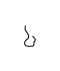

In [3]:
stroke = test_set.random_sample()
draw_strokes(stroke)
# print stroke

In [4]:
stroke

array([[-0.262,  0.196,  0.   ],
       [-0.109,  0.24 ,  0.   ],
       [ 0.   ,  0.546,  0.   ],
       [ 0.611,  1.004,  0.   ],
       [ 0.109,  0.349,  0.   ],
       [ 0.   ,  0.24 ,  0.   ],
       [-0.131,  0.262,  0.   ],
       [-0.393,  0.284,  0.   ],
       [-0.175,  0.218,  0.   ],
       [-0.109,  0.262,  0.   ],
       [ 0.   ,  0.349,  0.   ],
       [ 0.262,  0.327,  0.   ],
       [ 0.437,  0.109,  0.   ],
       [ 0.982, -0.044,  0.   ],
       [ 0.109, -0.065,  0.   ],
       [ 0.109, -0.349,  0.   ],
       [-0.022, -0.458,  0.   ],
       [ 0.218, -0.153,  0.   ],
       [ 0.065, -0.349,  0.   ],
       [-0.568, -0.699,  1.   ]], dtype=float32)